In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
# Load dataset
df = pd.read_csv('predictive_maintenance.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
None


In [45]:

summary_stats = df.describe()
print(summary_stats)

missing_values = df.isnull().sum()
print(missing_values)

               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000      0.000000  
25

## 1. Air Temperature: Histogram with KDE and Box Plot

Text(0.5, 1.0, 'Air Temperature Box Plot')

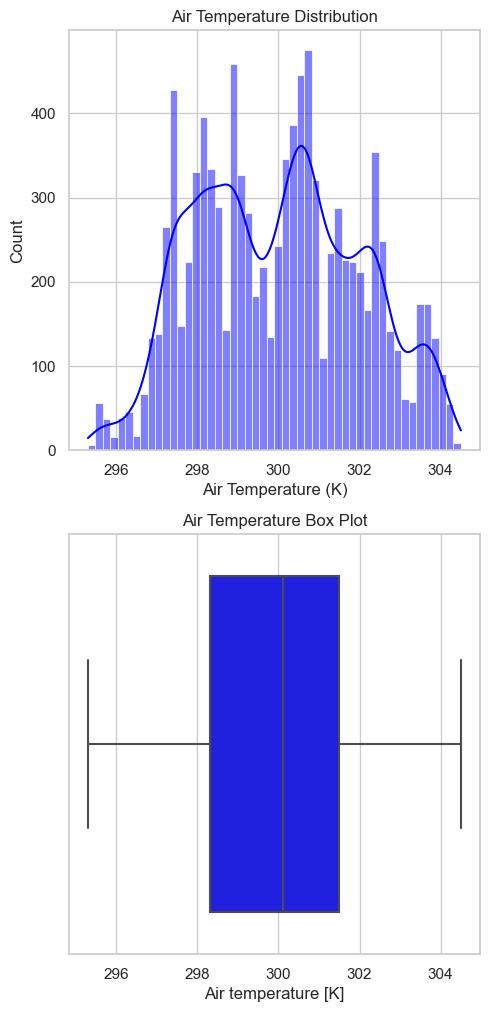

In [46]:

sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))


plt.subplot(2, 3, 1)
sns.histplot(df['Air temperature [K]'], bins=50, kde=True, color='blue')
plt.title('Air Temperature Distribution')
plt.xlabel('Air Temperature (K)')

plt.subplot(2, 3, 4)
sns.boxplot(x=df['Air temperature [K]'], color='blue')
plt.title('Air Temperature Box Plot')

## 2. Process Temperature: Scatter Plot vs Air Temperature and Box Plot

Text(0.5, 1.0, 'Process Temperature Box Plot')

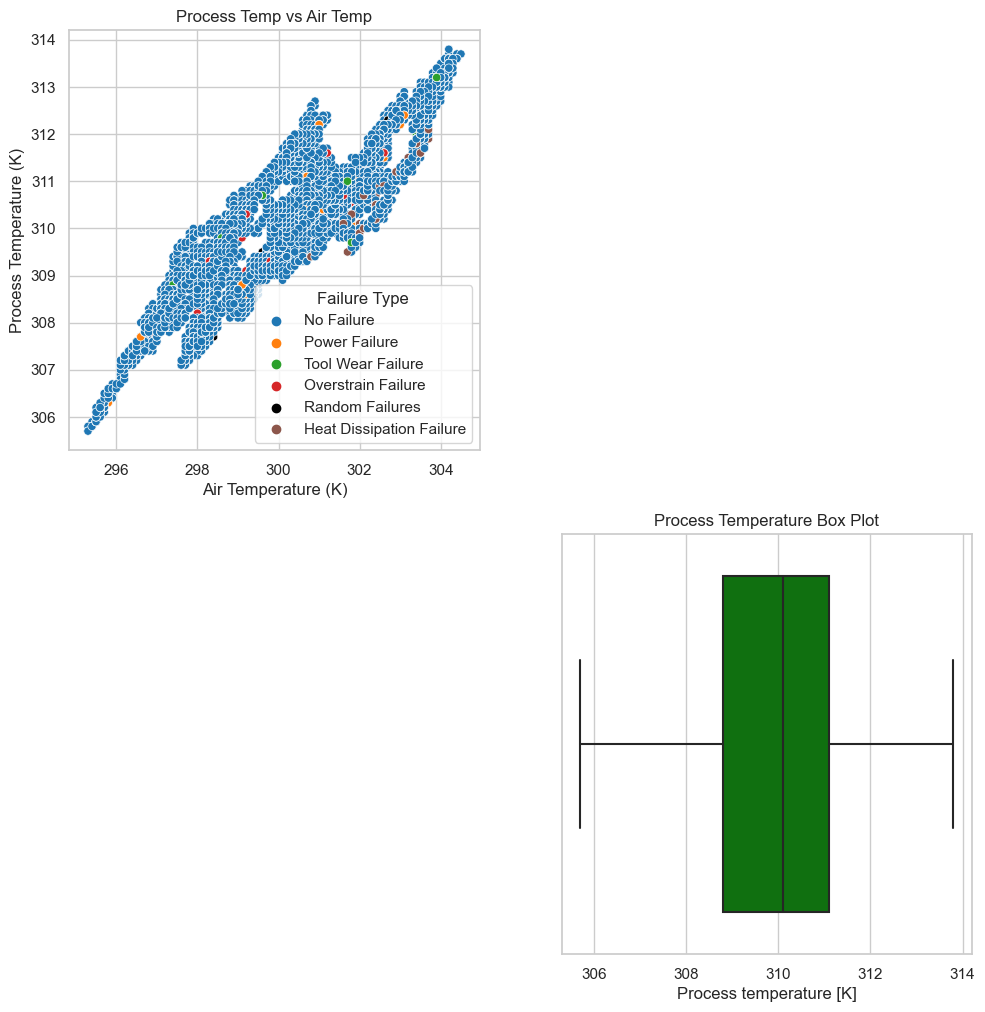

In [47]:
custom_palette = {
    'No Failure': '#1f77b4',       # Blue
    'Power Failure': '#ff7f0e',    # Orange
    'Tool Wear Failure': '#2ca02c',# Green
    'Overstrain Failure': '#d62728',# Red
    'Random Failures': '#000000',  # black
    'Heat Dissipation Failure': '#8c564b' # Brown
}

plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 1)
sns.scatterplot(x=df['Air temperature [K]'], y=df['Process temperature [K]'], hue=df['Failure Type'], palette= custom_palette)
plt.title('Process Temp vs Air Temp')
plt.xlabel('Air Temperature (K)')
plt.ylabel('Process Temperature (K)')

plt.subplot(2, 3, 5)
sns.boxplot(x=df['Process temperature [K]'], color='green')
plt.title('Process Temperature Box Plot')

## 3. Rotational Speed: Histogram with KDE and Box Plot

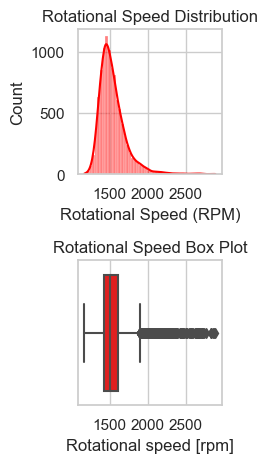

In [48]:

plt.subplot(2, 3, 3)
sns.histplot(df['Rotational speed [rpm]'], bins=50, kde=True, color='red')
plt.title('Rotational Speed Distribution')
plt.xlabel('Rotational Speed (RPM)')

plt.subplot(2, 3, 6)
sns.boxplot(x=df['Rotational speed [rpm]'], color='red')
plt.title('Rotational Speed Box Plot')

plt.tight_layout()
plt.show()

## Scatter Plot: Torque vs Rotational Speed with Machine Failure as Hue

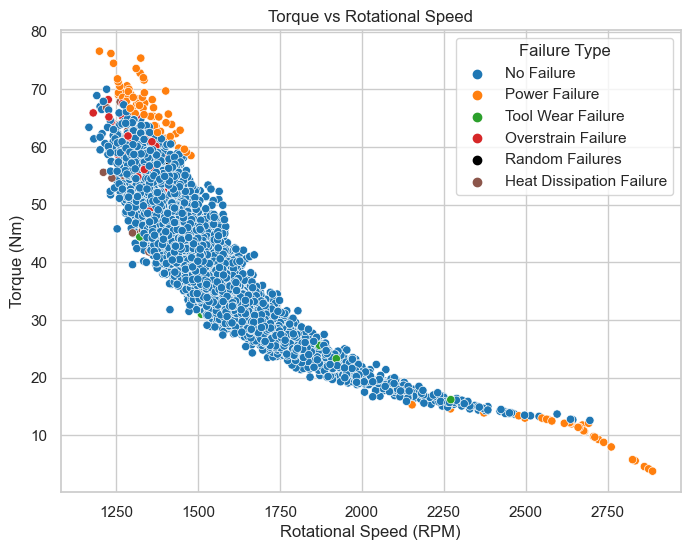

In [49]:


plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Rotational speed [rpm]'], y=df['Torque [Nm]'], hue=df['Failure Type'], palette= custom_palette)
plt.title('Torque vs Rotational Speed')
plt.xlabel('Rotational Speed (RPM)')
plt.ylabel('Torque (Nm)')
plt.show()

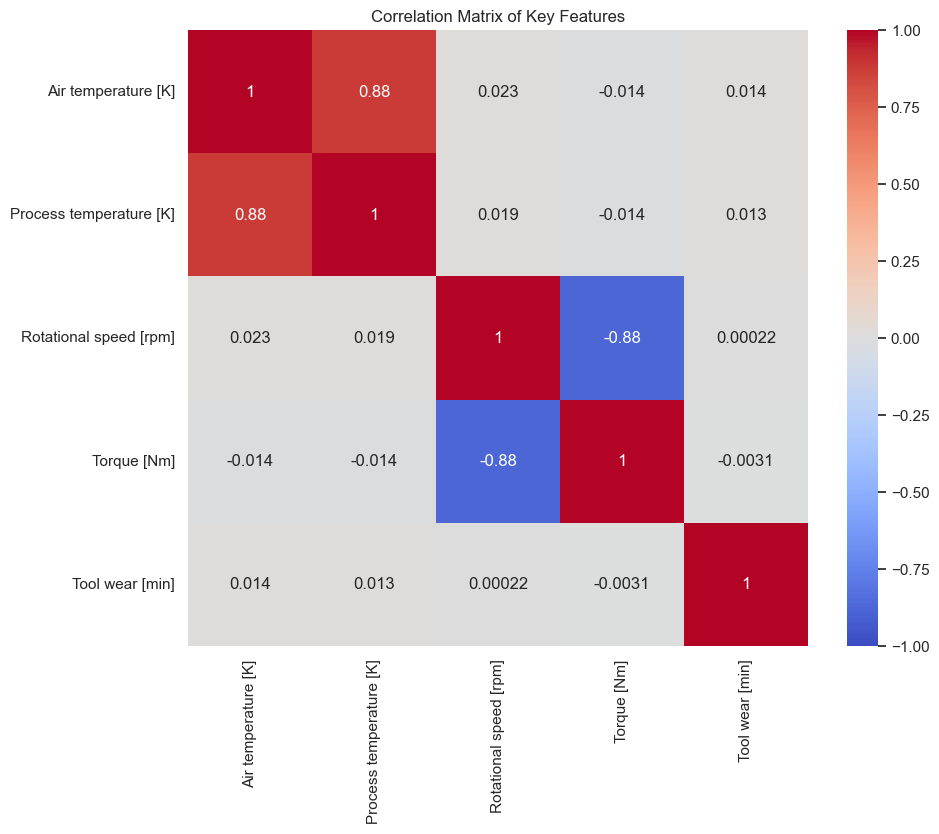

In [50]:

# Correlation Heatmap of Numeric Features
plt.figure(figsize=(10, 8))
correlation = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Key Features')
plt.show()


## Machine Failure Count

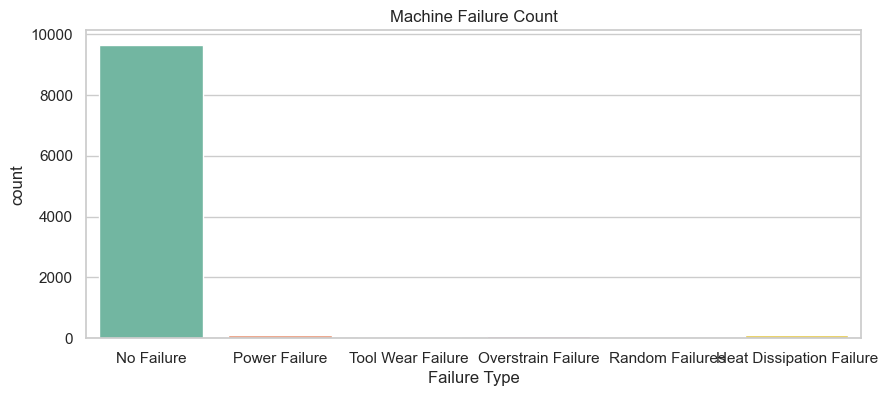

In [51]:

plt.figure(figsize=(10, 4))
sns.countplot(x='Failure Type', data=df, palette='Set2')
plt.title('Machine Failure Count')
plt.show()


## Machine Learning Model

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Encoding categorical variables

In [53]:
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])

## Spliting data into features (X) and Targets (Y)

In [54]:
X = df.drop(['UDI', 'Product ID', 'Failure Type', 'Target'], axis=1)
y = df['Target']

X.columns = X.columns.str.replace('[', '', regex=False).str.replace(']', '', regex=False).str.replace('<', '', regex=False)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Defining different Training Models used

In [56]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier()
}

model_results = {}

In [57]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.9725
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1939
           1       0.62      0.26      0.37        61

    accuracy                           0.97      2000
   macro avg       0.80      0.63      0.68      2000
weighted avg       0.97      0.97      0.97      2000

[[1929   10]
 [  45   16]]
Random Forest Accuracy: 0.9825
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.82      0.54      0.65        61

    accuracy                           0.98      2000
   macro avg       0.91      0.77      0.82      2000
weighted avg       0.98      0.98      0.98      2000

[[1932    7]
 [  28   33]]
K-Nearest Neighbors Accuracy: 0.9705
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1939
           1       0.57      0.13      0.21        61

    accuracy           

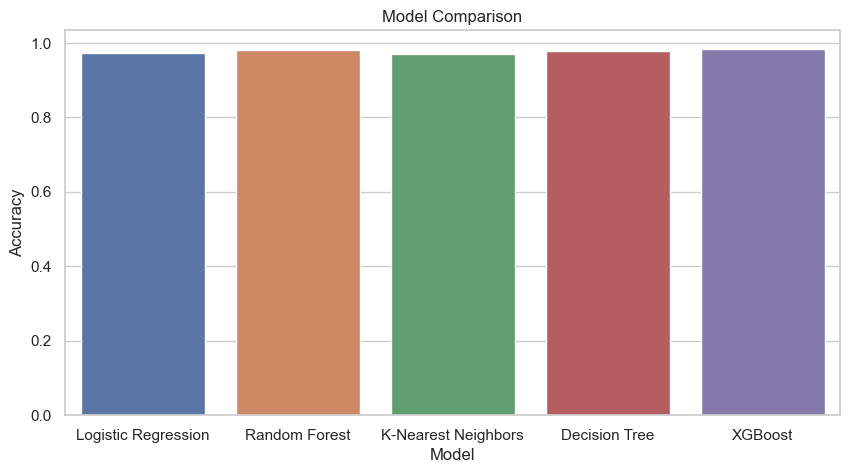

In [58]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(model_results.keys()), y=list(model_results.values()))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

In [59]:
best_model_name = max(model_results, key=model_results.get)
best_model = models[best_model_name]
print(best_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [60]:
print(f"\nBest Model: {best_model_name} with accuracy: {model_results[best_model_name]:.4f}")


Best Model: XGBoost with accuracy: 0.9850


## Testing for Dummy Data

In [61]:
dummy_data = pd.DataFrame({
    'Air temperature K': [298.1],     # Air temperature in Kelvin
    'Process temperature K': [308.1], # Process temperature in Kelvin
    'Rotational speed rpm': [1550],   # Rotational speed in rpm
    'Torque Nm': [38.7],              # Torque in Nm
    'Tool wear min': [220],           # Tool wear in minutes
    'Type': [1]                       # Encoded Type (e.g., 'M' as 1)
})

dummy_data = dummy_data[X_train.columns]

In [62]:
maintenance_prediction = best_model.predict(dummy_data)

In [63]:
if maintenance_prediction[0] == 1:
    print("Maintenance is required (machine is likely to fail).")
else:
    print("Maintenance is not required (machine is unlikely to fail).")

Maintenance is not required (machine is unlikely to fail).
